# **ASM2 -- SVM**

In [1]:
# import libraries
import numpy as np
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from skimage import feature as ft
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

## **Pre-processing**

In [2]:
#load cifar100
(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data() 
print(y_label_train.shape)

#z-score normilization
mean = np.mean(x_img_train, axis=(0, 1, 2, 3))
std = np.std(x_img_train, axis=(0, 1, 2, 3))

x_img_train = (x_img_train - mean) / (std + 1e-7)
x_img_test = (x_img_test - mean) / (std + 1e-7) 

169017344/169001437 [==============================] - 2s 0us/step
(50000, 1)


In [3]:
# hog

import tensorflow as tf
def hog(data_gray):
  hog_images = []
  hog_features = []
  for image in data_gray:
    fd,hog_image = ft.hog(image, orientations=8, pixels_per_cell=(8,8),cells_per_block=(2, 2),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
  return hog_features,  hog_images


reshape_train = x_img_train.reshape((x_img_train.shape[0], 32, 32, 3))
reshape_test = x_img_test.reshape((x_img_test.shape[0], 32, 32, 3))

train_features, train_images = hog(reshape_train)
test_features, test_images = hog(reshape_test)

## **Train/Test**

In [7]:
# data after hog
from sklearn.svm import LinearSVC

#train the model
svm = LinearSVC()
print("Training a Linear SVM Classifier.")
svm.fit(train_features, y_label_train.ravel())

predict_result = svm.predict(test_features)

rate = svm.score(test_features,y_label_test)
print('The classification accuracy is %f' % rate)

Training a Linear SVM Classifier.
The classification accuracy is 0.209600


## **Turning parameter**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1,5,10]}
print("Parameter grid:\n{}".format(param_grid))

# Use GridSearcCV on the training set
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10,
                          return_train_score=True)
try:
    grid_search.fit(train_features, y_label_train.ravel())

    # Accuracy on test set of the model with selected best parameters:
    print("Test set score: {:.2f}".format(grid_search.score(test_features,y_label_test)))

    # You can also show these results:
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
    print("Best estimator:\n{}".format(grid_search.best_estimator_))
except Exception as e:
    print('something wrong')

## **Results**

-----------------SVM Report---------------
F1 score: 0.16564878899063445
Accuracy score: 0.2096
Confusion matrix: 
 [[53  0  0 ...  0  0  1]
 [ 0 15  0 ...  0  1  2]
 [ 2  1  0 ...  0  4  0]
 ...
 [ 1  0  0 ... 15  1  0]
 [ 2  1  0 ...  1  5  1]
 [ 4  1  0 ...  0  1 19]]
Plotting confusion matrix


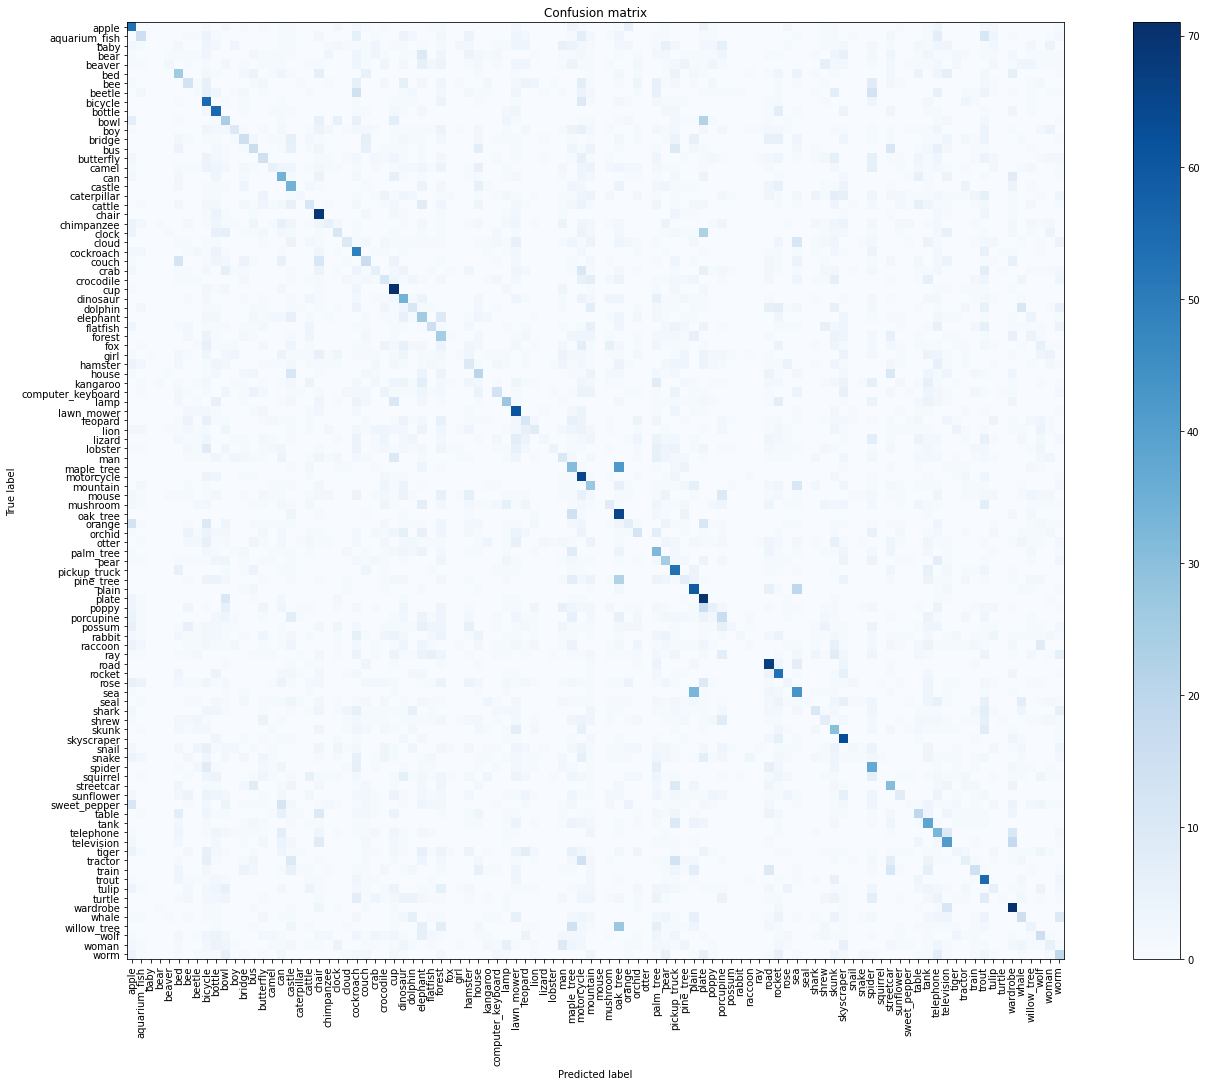

              precision    recall  f1-score   support

           0       0.28      0.53      0.37       100
           1       0.23      0.15      0.18       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100
           4       0.25      0.02      0.04       100
           5       0.20      0.26      0.23       100
           6       0.15      0.13      0.14       100
           7       0.02      0.01      0.01       100
           8       0.21      0.55      0.31       100
           9       0.28      0.55      0.37       100
          10       0.17      0.24      0.20       100
          11       0.26      0.09      0.13       100
          12       0.19      0.15      0.17       100
          13       0.19      0.16      0.17       100
          14       0.15      0.14      0.14       100
          15       0.14      0.05      0.07       100
          16       0.21      0.34      0.26       100
          17       0.20    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
# svm report and analysis
labelNames =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']
from sklearn import metrics

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

svm_f1 = metrics.f1_score(y_label_test, predict_result, average= "weighted")
svm_cm = metrics.confusion_matrix(y_label_test, predict_result)
print("-----------------SVM Report---------------")
print("F1 score: {}".format(svm_f1))
print("Accuracy score: {}".format(rate))
print("Confusion matrix: \n", svm_cm)
print('Plotting confusion matrix')

plt.figure(figsize = (20,15))
plot_confusion_matrix(svm_cm, labelNames)
plt.savefig('svm_confusion_metrics.png',figsize = (20,15),dpi=400)
plt.show()

print(metrics.classification_report(y_label_test, predict_result))